In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
sys.path.insert(0, '../../005_src/') #use relative path
os.chdir("../../005_src")

from config import *
##--------------------------------
# LOAD BEST COMBOS
##-------------------------------- 
GCN_num = "017"
this_GCN = f"GCN_{GCN_num}"
MODEL_PATH =os.path.join(OUTPUT_DIR,this_GCN)
dict_best_combos_descr = f"{this_GCN}_best_combos"
dict_best_combos_path = os.path.join(MODEL_PATH,dict_best_combos_descr)
reloaded_best_combos = pkl.load(open(f'{dict_best_combos_path}.pkl',"rb"))
    
# get all the best combination
all_combo = [v[0] for k,v in reloaded_best_combos.items()]
l = len(all_combo)

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Custom loss imported
Functions Plotting import successful
Functions Data Adjustments import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

at 11h01

In [2]:
from _03_Networks.GCN_017.GCN_model_017 import *
from _03_Networks.GCN_017.GCN_trainer_017 import *
from _03_Networks.GCN_017.GCN_parameters_017 import *
from _03_Networks.GCN_017.Custom_losses import *
this_GCN, ts_import = check_import()

imported parameters from: GCN_parameters_017.py at 11h01m19s
imported trainer: GCN_017 at 11h01m19s


In [3]:
import PIL.Image
from IPython.display import Image as Image_disp

In [4]:
device = cudaOverview()

CUDA available
Number of Devices: 1
ID current Device NVIDIA GeForce GTX 1050 Ti: 0
	current GPU memory usage by tensors in bytes:687104
	current GPU memory managed by caching allocator in bytes:2097152


20210731-15h28m46s
GCN_017: 20210731-15h28m46s
architecture=HL03_bn(
  (actfun): ReLU()
  (conv1): GraphConv(6, 64)
  (conv2): GraphConv(64, 128)
  (conv3): GraphConv(128, 256)
  (conv4): GraphConv(256, 2)
  (bn1): GraphNorm(64)
  (bn2): GraphNorm(128)
  (bn3): GraphNorm(256)
)


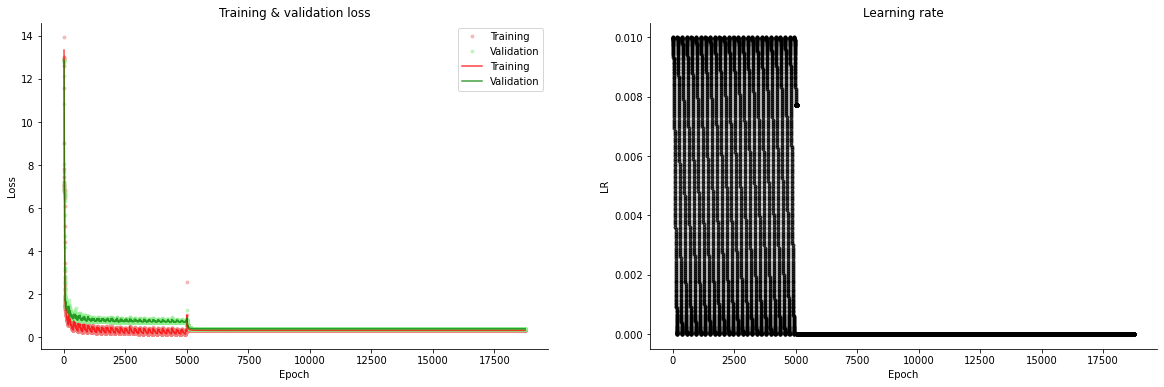

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/20210731-15h28m46s/20210731-15h28m46s_train_val_loss_plot.png


In [5]:
# this is to exclude some that have been accidentally deleted (yes -_-)
exclude_ones = ["20210729-15h18m11s"]

for k,v in reloaded_best_combos.items():
    this_date,ts = k.split("-")
    
    check_string = f"{this_date}-{ts}"
    print (check_string)
    if not check_string in exclude_ones:
        GCN_num = "017"
        this_GCN = f"GCN_{GCN_num}"

        print (f"{this_GCN}: {k}")  

        # reload dictionary
        MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
        MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}-{ts}/")
        #print (MODEL_OUTPUT_PATH_TODAY)

        dateset_test_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/dataset_test"
        dict_text_output_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/{this_date}-{ts}_training_parameters"

        reloaded_dict = pkl.load(open(f'{dict_text_output_path}.pkl',"rb"))

        input_file_name = reloaded_dict["input_file_name"]
        architecture = reloaded_dict["model_architecture"]
        hidden_layers_sizes = reloaded_dict["hidden_layers_sizes"]
        size_input = reloaded_dict['size_input']
        size_output = reloaded_dict['size_output']
        random_seed = reloaded_dict["random_seed"]
        activation_fun = reloaded_dict["activation_function"]   

        print (f"{architecture=}")

        # load losses
        t_losses_load = pkl.load(open( reloaded_dict['train_losses_path'], 'rb'))
        v_losses_load = pkl.load(open( reloaded_dict['val_losses_path'], 'rb'))
        lr_load = pkl.load(open( reloaded_dict['lr_path'], 'rb'))

        ##================================
        # TRAIN AND VAL LOSSES
        ##================================
        fig = plot_training(t_losses_load,
                          v_losses_load,
                          learning_rate = lr_load,
                          gaussian=True,
                          sigma=2,
                          figsize=(20, 6),
                          mytitle = 'Training & validation loss'
                          )

        description = f"{this_date}-{ts}"
        new_png = f"{description}_train_val_loss_plot.png"
        new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
        plt.savefig(new_png_path)
        plt.show()
        print (f"Plot saved in {new_png_path}")

        ##================================
        ## MODEL INIT
        ##================================
        num_hidden_layers = len(hidden_layers_sizes)

        if num_hidden_layers == 3:

            hc_1 = hidden_layers_sizes[0]
            hc_2 = hidden_layers_sizes[1]
            hc_3 = hidden_layers_sizes[2]

            model = HL03_bn(
                                num_input_features=size_input,
                                num_output_features =size_output,
                                random_seed = random_seed,
                                hc_1 = hc_1,
                                hc_2 = hc_2,
                                hc_3 = hc_3,
                                activation_function = activation_fun,
                                layer_type = layer_type,
                                normalization = normalization,
                                printstat = printstat,                
                                )
        load_model = model
        try:
            load_path = reloaded_dict['model_path']
            load_model.load_state_dict(torch.load(load_path))
            load_model.eval()


            MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
            MODEL_OUTPUT_PATH_DATASETS = os.path.join(MODEL_OUTPUT_PATH,f"DATASETS/")
            datasets_list = sorted(glob.glob(f"{MODEL_OUTPUT_PATH_DATASETS}"+"/**/*"+f'{input_file_name}_dataset*',
                                                 recursive=True))
            if len( datasets_list) == 5:                               
                    print ("\n> DATASETS FOUND")
                    #print (*datasets_list, sep = "\n")

                    dataset_train = torch.load(datasets_list[0], map_location=torch.device('cpu') )
                    # map_location=lambda storage, loc: storage.cuda(0))
                    dataset_val = torch.load(datasets_list[1], map_location=torch.device('cpu') )
                    dataset_test = torch.load(datasets_list[2], map_location=torch.device('cpu') )
                    dataset_shuttle_train = torch.load(datasets_list[3], map_location=torch.device('cpu') )
                    dataset_shuttle_val = torch.load(datasets_list[4], map_location=torch.device('cpu') )

        except Exception as e:
            print (e)


In [6]:
deleted_folders = delete_empty_r(directory= MODEL_OUTPUT_PATH,printstat = True)